# Vectorized String Operations

Based on Chapter 3 from *Python for Data Science Handbook*, by Jake VanderPlas.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

In [2]:
class display(object):
    
    """Display HTML representation of multiple objects"""
    
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Introducing Pandas String Operations

In [3]:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [4]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']

[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [5]:
names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

In [6]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

### Tables of Pandas String Methods

In [7]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [8]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [9]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [10]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [11]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

#### Methods using regular expressions

In [12]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [13]:
# Extract the first name from each by asking for a contiguous group of characters at the beginning of each element
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [14]:
# Finding all names that start and end with a consonant
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### Miscellaneous methods

In [15]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [16]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [17]:
# Extract the last name of each entry
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Indicator variables

In [18]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [19]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Working with Time Series

In [20]:
from datetime import datetime

datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [21]:
from dateutil import parser

date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [22]:
date.strftime('%A')

'Saturday'

### Typed arrays of times: NumPy's datetime64

In [23]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [24]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [25]:
# A day-based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [26]:
# A minute-based datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Notice that the time zone is automatically set to the local time on the computer executing the code. You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [27]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

# Dates and times in pandas: best of both worlds

In [28]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [29]:
date.strftime('%A')

'Saturday'

In [30]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [31]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])

data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [32]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [33]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

In [34]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [35]:
# 'D' to indicate daily frequency
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [36]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: `pd.date_range()`

In [37]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [38]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [39]:
pd.date_range('2015-07-03', periods=8, freq='h')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [40]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [41]:
pd.timedelta_range(0, periods=10, freq='h')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='h')

In [42]:
pd.timedelta_range(0, periods=9, freq="2h30min")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150min')

In [43]:
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Resampling, Shifting, and Windowing

In [44]:
import yfinance as yf

# Fetch Google stock data
goog = yf.download('GOOG', start='2004-01-01', end='2016-12-31')

# Display the first few rows of the data
goog.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,28.322241,28.322241,27.570307,27.846546,27.814894,262719
2014-03-28,27.983171,28.243956,27.857019,27.922838,27.891100,824257
2014-03-31,28.266893,28.272379,27.770258,27.772251,27.740683,216593
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.248211,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.240242,2942055


In [45]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2014-03-27 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       698 non-null    float64
 1   High       698 non-null    float64
 2   Low        698 non-null    float64
 3   Close      698 non-null    float64
 4   Adj Close  698 non-null    float64
 5   Volume     698 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 38.2 KB


<Figure size 2000x800 with 0 Axes>

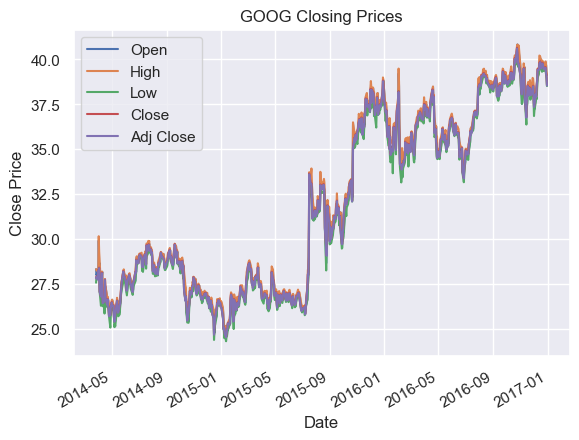

In [46]:
goog1 = goog.drop(columns=['Volume'])

# Plot the closing prices by Series
plt.figure(figsize=(20, 8))  # Set the size of the plot
goog1.plot(title='GOOG Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

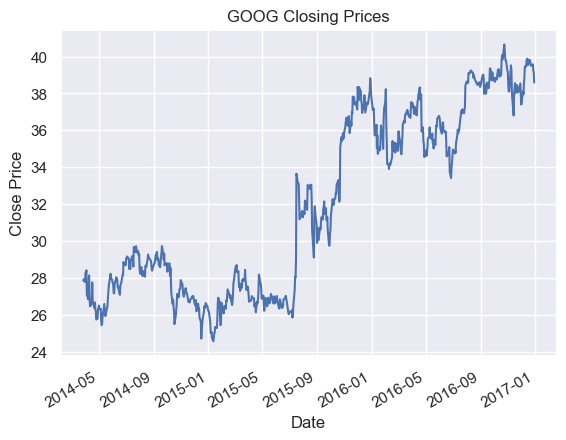

In [47]:
# Extract the 'Close' column
googc = goog['Close']

# Plot the closing prices by Series
googc.plot(title='GOOG Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

                Close
Date                 
2014-03-27  27.846546
2014-03-28  27.922838
2014-03-31  27.772251
2014-04-01  28.280355
2014-04-02  28.272379


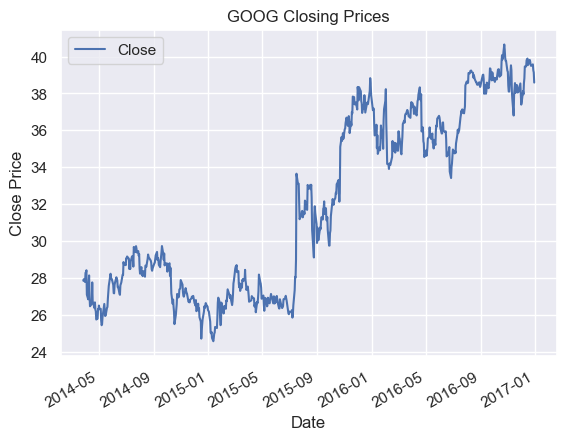

In [48]:
# Convert Series to DataFrame
goog_df = googc.to_frame(name='Close')

# Display the DataFrame
print(goog_df.head())

# Plot the closing prices by Dataframe
goog_df.plot(title='GOOG Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

### Resampling and converting frequencies

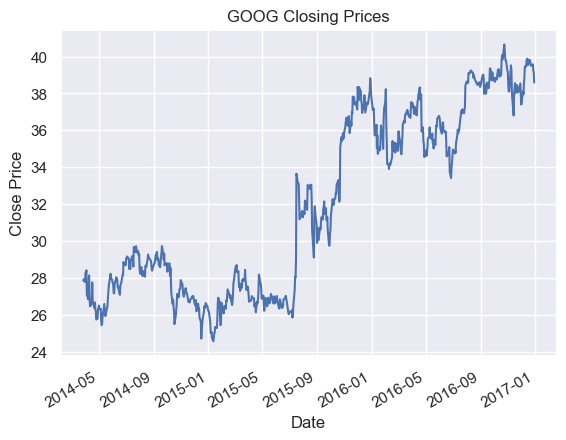

In [49]:
# Extract the 'Close' column
googc = goog['Close']

# Plot the closing prices by Series
googc.plot(title='GOOG Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

One common need for time series data is resampling at a higher or lower frequency. This can be done using the `resample()` method, or the much simpler `asfreq()` method. The primary difference between the two is that `resample()` is fundamentally a data aggregation, while `asfreq()` is fundamentally a data selection.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year:

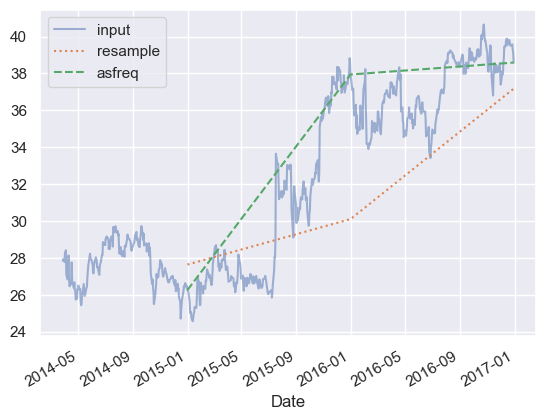

In [50]:
googc.plot(alpha=0.5, style='-')

googc.resample('BYE').mean().plot(style=':')

googc.asfreq('BYE').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

Notice the difference: at each point, `resample` reports the average of the previous year, while `asfreq` reports the value at the end of the year.

For up-sampling, `resample()` and `asfreq()` are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the `pd.fillna()` function discussed previously, `asfreq()` accepts a `method` argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends):

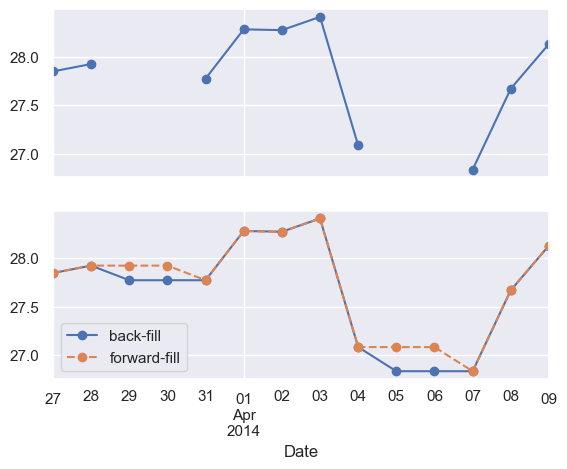

In [51]:
fig, ax = plt.subplots(2, sharex=True)

data = googc.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')

ax[1].legend(["back-fill", "forward-fill"]);

# Example: Visualizing Seattle Bicycle Counts

In [52]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [53]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date')
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
10/02/2012 01:00:00 PM,55.0,7.0,48.0
10/02/2012 02:00:00 PM,130.0,55.0,75.0
10/02/2012 03:00:00 PM,152.0,81.0,71.0
10/02/2012 04:00:00 PM,278.0,167.0,111.0
10/02/2012 05:00:00 PM,563.0,393.0,170.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102947 entries, 10/02/2012 01:00:00 PM to 06/30/2024 11:00:00 PM
Data columns (total 3 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Fremont Bridge Sidewalks, south of N 34th St                        102919 non-null  float64
 1   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  102919 non-null  float64
 2   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  102919 non-null  float64
dtypes: float64(3)
memory usage: 3.1+ MB


In [55]:
data = data.drop(columns=['Fremont Bridge Sidewalks, south of N 34th St'])

data.columns = ['West', 'East']

data['Total'] = data.eval('West + East')

data.head()

,West,East,Total
Date,,,
10/02/2012 01:00:00 PM,7.0,48.0,55.0
10/02/2012 02:00:00 PM,55.0,75.0,130.0
10/02/2012 03:00:00 PM,81.0,71.0,152.0
10/02/2012 04:00:00 PM,167.0,111.0,278.0
10/02/2012 05:00:00 PM,393.0,170.0,563.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102947 entries, 10/02/2012 01:00:00 PM to 06/30/2024 11:00:00 PM
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   West    102919 non-null  float64
 1   East    102919 non-null  float64
 2   Total   102919 non-null  float64
dtypes: float64(3)
memory usage: 3.1+ MB


In [57]:
#null check
data.isnull().sum()

West     28
East     28
Total    28
dtype: int64

In [58]:
data.dropna().describe()

,West,East,Total
count,102919.000000,102919.000000,102919.000000
mean,45.540386,60.186292,105.726678
std,59.811079,81.791663,131.828673
min,0.000000,0.000000,0.000000
25%,5.000000,7.000000,13.000000
50%,26.000000,32.000000,59.000000
75%,62.000000,79.000000,144.000000
max,667.000000,850.000000,1097.000000


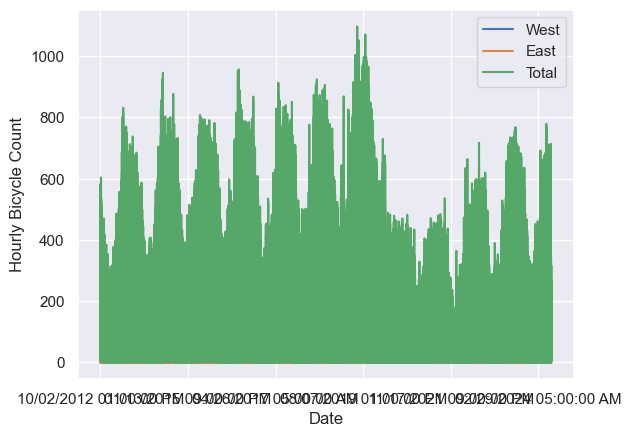

In [59]:
# Not a good plot

data.plot()
plt.ylabel('Hourly Bicycle Count');

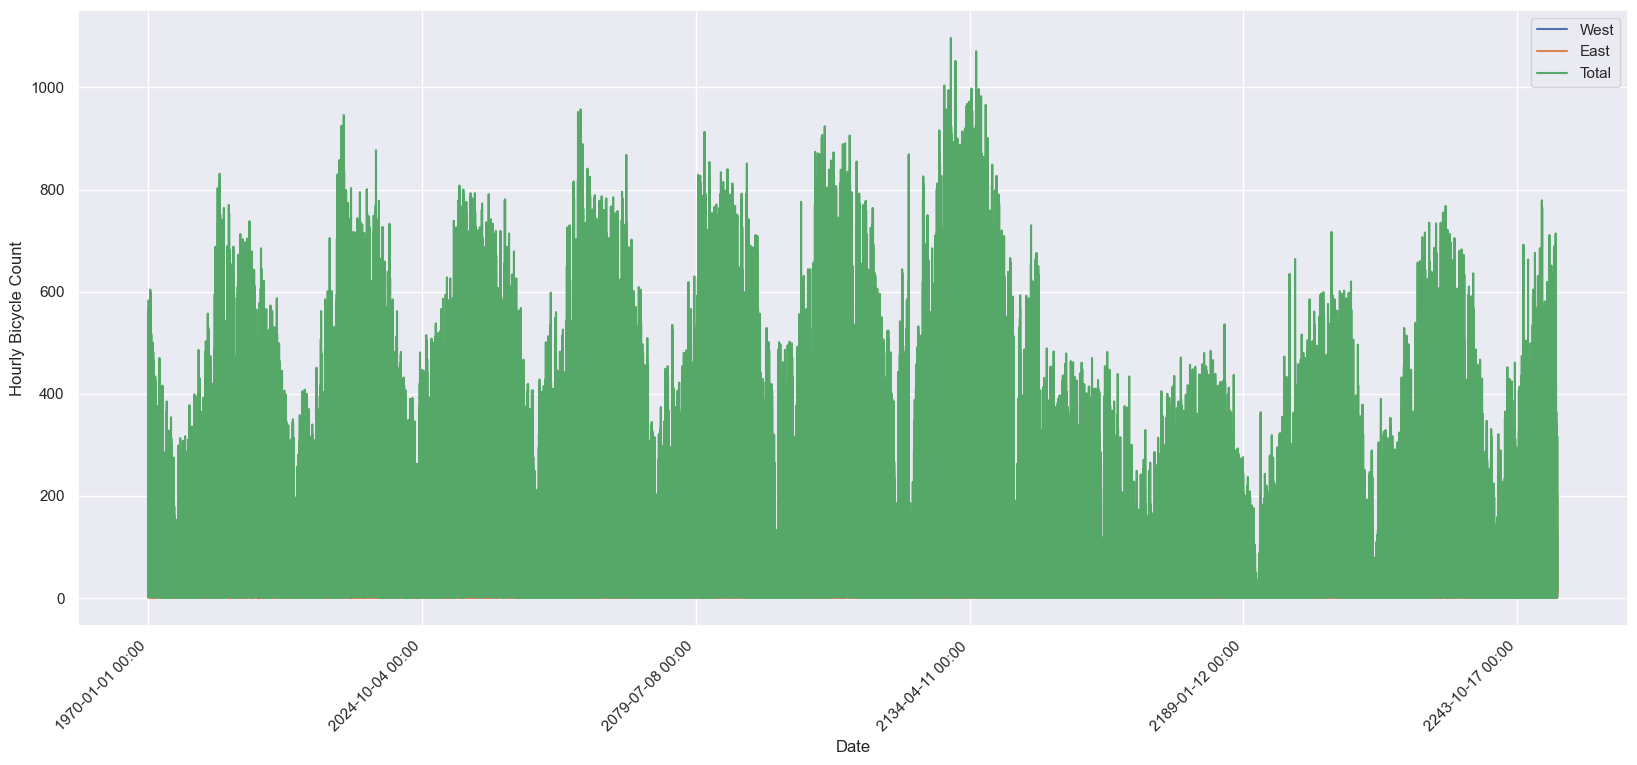

In [60]:
# Plotting the data
fig, ax = plt.subplots(figsize=(20, 8))
data.plot(ax=ax)
ax.set_ylabel('Hourly Bicycle Count')

# Formatting the x-axis
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))

# Optionally rotate and adjust the labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

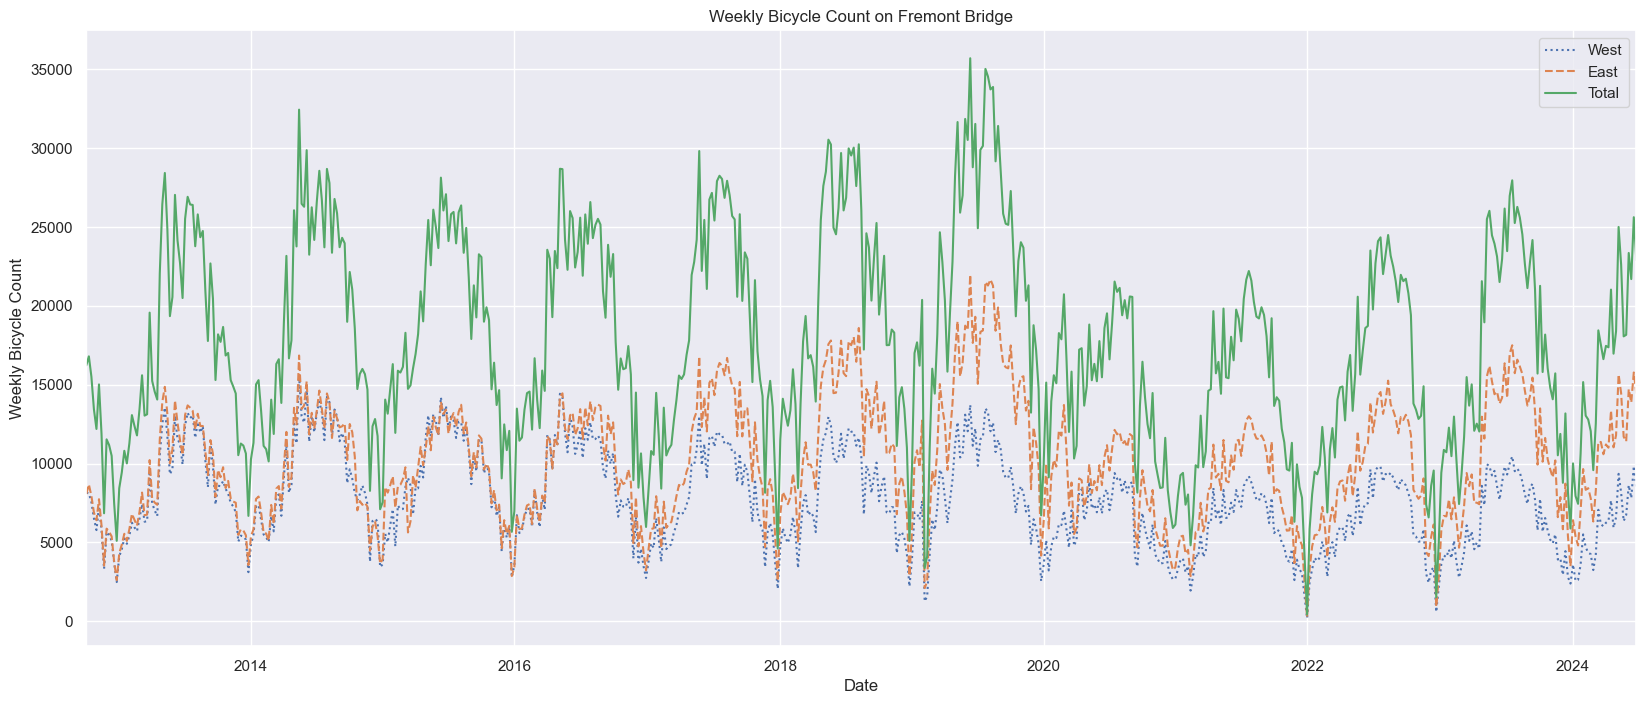

In [61]:
# Ensure the index is of type DatetimeIndex
data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')

# Resample the data to weekly frequency and sum the counts
weekly = data.resample('W').sum()

# Plot the resampled data
weekly.plot(style=[':', '--', '-'], figsize=(20, 8))
plt.ylabel('Weekly Bicycle Count')
plt.title('Weekly Bicycle Count on Fremont Bridge')
plt.show()

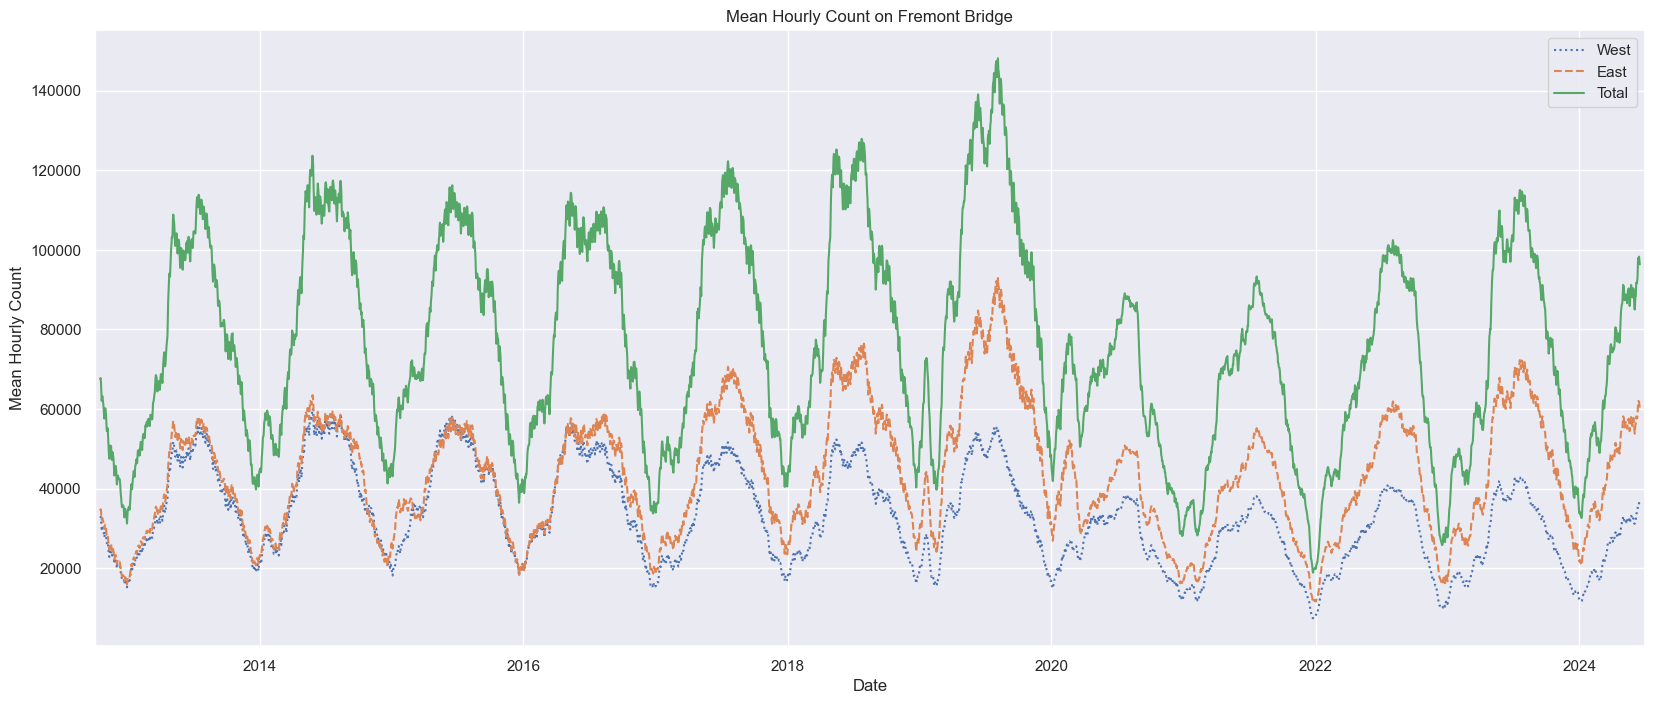

In [62]:
# Resample the data to weekly frequency and sum the counts
daily = data.resample('D').sum()

# Plot the resampled data
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'], figsize=(20, 8))
plt.ylabel('Mean Hourly Count')
plt.title('Mean Hourly Count on Fremont Bridge')
plt.show()

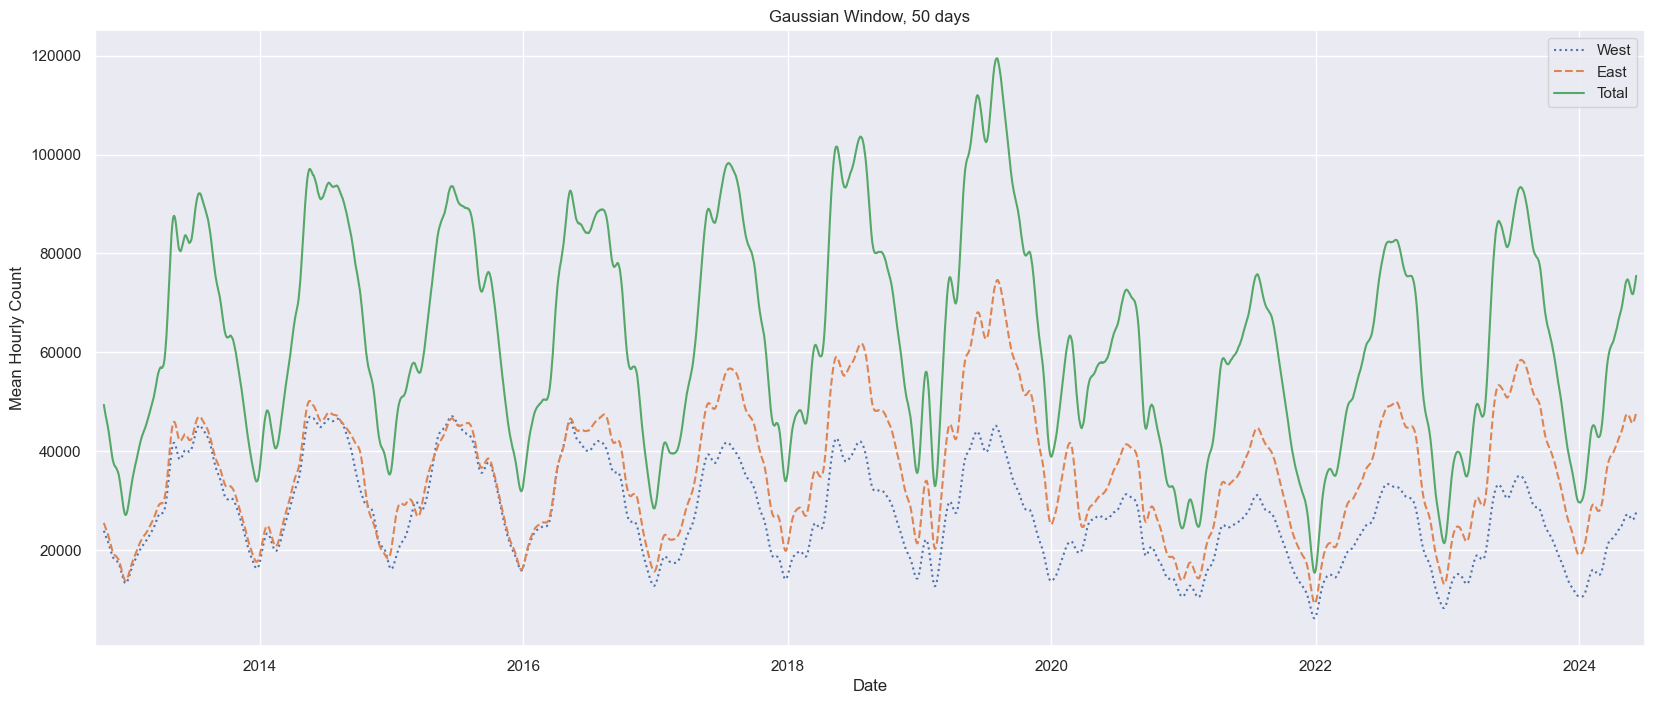

In [63]:
# Smoother version, using a Gaussian Window for 50 days, std = 10 days.
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'], figsize=(20, 8))
plt.ylabel('Mean Hourly Count')
plt.title('Gaussian Window, 50 days')
plt.show()

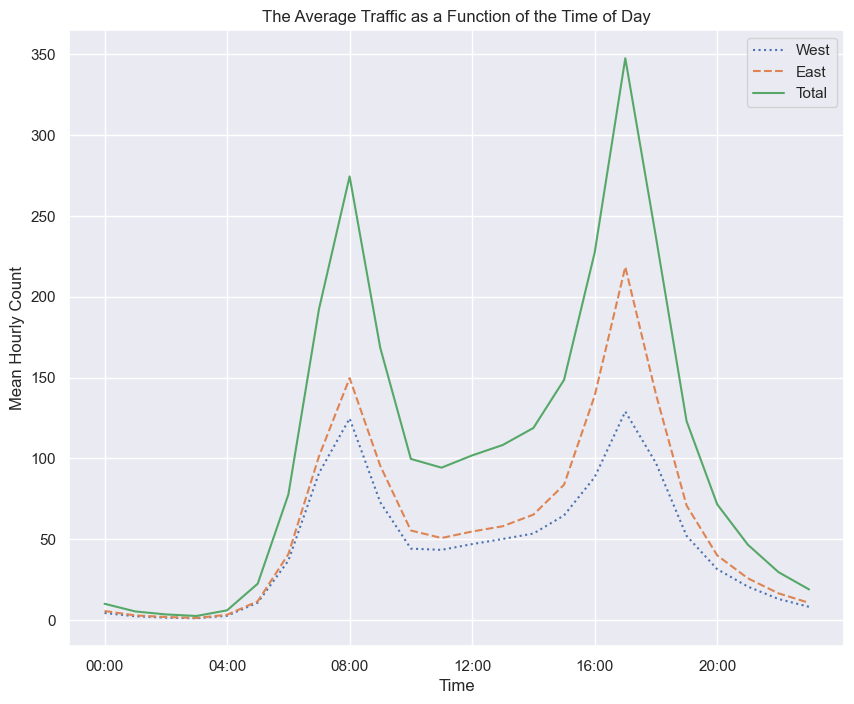

In [64]:
# The average traffic as a function of the time of day
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=(10, 8))
plt.xlabel('Time')
plt.ylabel('Mean Hourly Count')
plt.title('The Average Traffic as a Function of the Time of Day')
plt.show()

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. 

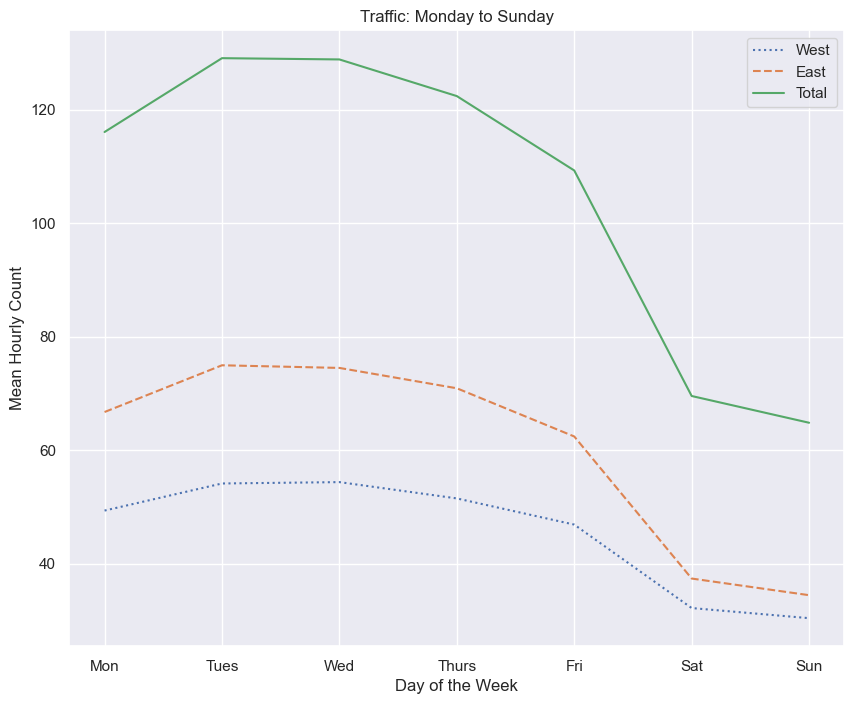

In [65]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'], figsize=(10, 8))
plt.ylabel('Mean Hourly Count')
plt.xlabel('Day of the Week')
plt.title('Traffic: Monday to Sunday')
plt.show()

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends. We'll start by grouping by both a flag marking the weekend, and the time of day:

In [66]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

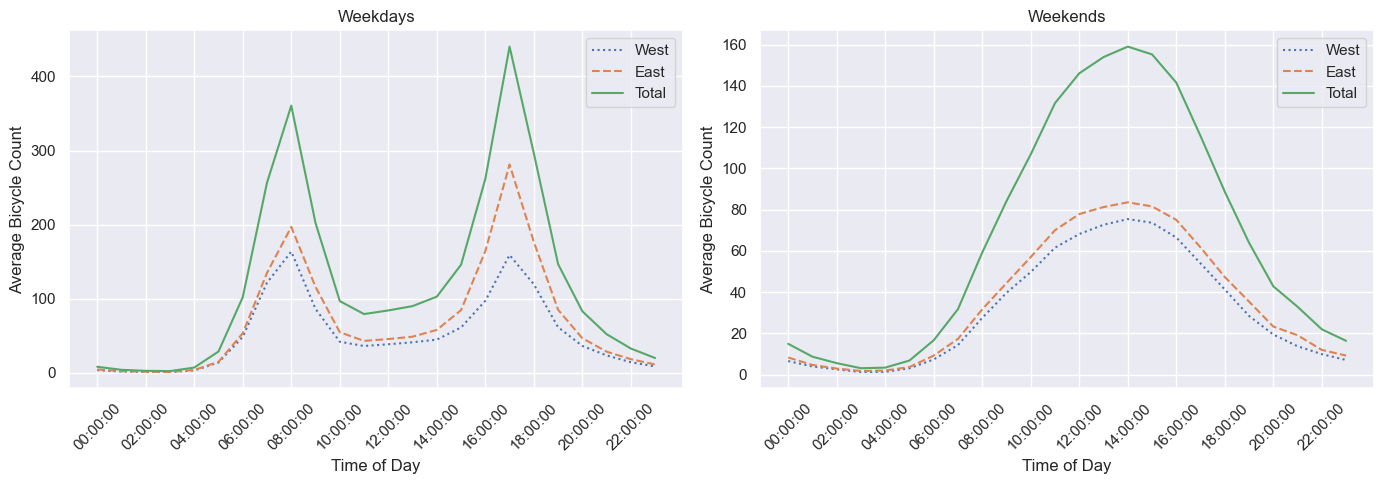

In [67]:
# Plot two panels side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Define hourly ticks for the x-axis
hourly_ticks = pd.date_range("00:00", "23:00", freq="2h").time

# Plot for Weekdays
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
ax[0].set_xticklabels(hourly_ticks, rotation=45)
ax[0].set_xlabel('Time of Day')
ax[0].set_ylabel('Average Bicycle Count')

# Plot for Weekends
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])
ax[1].set_xticklabels(hourly_ticks, rotation=45)
ax[1].set_xlabel('Time of Day')
ax[1].set_ylabel('Average Bicycle Count')

plt.tight_layout()
plt.show()

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.